## LinearRegression to predict movie revenues

In [40]:
from __future__ import division  # this line is important to avoid unexpected behavior from division
import os
import csv
import numpy as np
from numpy import genfromtxt
import pandas as pd
import math
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 4) # set default size of plots

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data into python data structures

In [41]:
PATH = "C:\CMPSCI585\Project\OurProject\Data\RottenTomatoesData.csv"   #Change the path accordingly

df=pd.read_csv(PATH, sep=',')
data = df.values
#print data[:2][0][0:5]
len_data = data.shape[0]
print 'Total length of data',len_data
train_X = df.drop('revenue', axis=1).values[1:int(0.80*len_data)]
train_y = df.iloc[:,-1].values[1:int(0.80*len_data)]
test_X = df.drop('revenue', axis=1).values[int(0.80*len_data):]
test_y = df.iloc[:,-1].values[int(0.80*len_data):]
print train_X.shape
print train_y.shape
print test_X.shape
print test_y.shape

Total length of data 2216
(1771L, 15L)
(1771L,)
(444L, 15L)
(444L,)


In [45]:

# model = LinearRegression()
# model.fit(train_X,train_y)
# predictions = model.predict(test_X)
# print predictions[:5]
# print test_y[:5]

# MSE = mean_squared_error(test_y, predictions)
# print math.sqrt(MSE)

selector = SelectKBest(f_regression)
selector.fit(train_X,train_y)
X_train = train_X[:, selector.get_support()]
X_test = test_X[:, selector.get_support()]
#print selector.get_support()

model = LinearRegression()
#model = DecisionTreeRegressor(max_depth = 20)
model.fit(X_train,train_y)
predictions = model.predict(X_test)
print predictions[:5]
print test_y[:5]

MSE = mean_squared_error(test_y, predictions)
print math.sqrt(MSE)

[  6.56987725e+06   8.58506439e+06   2.71859935e+08   4.46107689e+06
   3.46318904e+08]
[  6670712  66468332 185770160 136150434   7390108]
124007222.414


## Plotting Revenue vs imdbRating

(2216L,)
(2216L,)


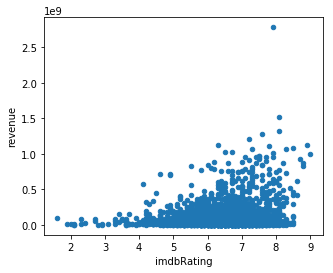

In [60]:
PATH = "C:\CMPSCI585\Project\OurProject\Data\ScatterPlot_Revenue_Rating.csv"
df=pd.read_csv(PATH, sep=',')
data = df.values
#s = df.ix[:,0]
x = df[df.columns[0]].values
print x.shape
y = df[df.columns[-1]].values
print y.shape
ser =  pd.Series(index = x,data=y)
df =ser.to_frame()

df.reset_index(inplace=True)
df.columns = ['imdbRating','revenue']
df.plot(kind='scatter',x='imdbRating',y='revenue')
plt.show()